In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from pathlib import Path
from scipy.stats import linregress
import numpy as np
import pandas as pd

In [3]:
# Read CSV into pandas dataframe, verify it read in correctly
historical_health_df = pd.read_csv('Resources/historical_health_percent.csv')

pd.options.display.max_rows=None
historical_health_df.head()

,Time,Time Code,Country Name,Country Code,Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]
0,2000,YR2000,Australia,AUS,7.599617
1,2000,YR2000,Austria,AUT,9.203713
2,2000,YR2000,Belgium,BEL,7.999176
3,2000,YR2000,Canada,CAN,8.248144
4,2000,YR2000,Czechia,CZE,5.701030


In [4]:
historical_health_df.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]'],
      dtype='object')

In [5]:
# Reduce dataframe to only the data needed 
historical_health_reduced = historical_health_df[['Time', 'Country Name', 
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]']]

# Rename columns 
historical_health_reduced = historical_health_reduced.rename(columns={'Time' : 'Year', 'Country Name' : 'Country', 
                                                                       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]' :  'Current health expenditure (% of GDP)'})

historical_health_reduced.head(1)

,Year,Country,Current health expenditure (% of GDP)
0,2000,Australia,7.599617


In [6]:
# Clean dataframe, remove NaN
historical_health_reduced.dropna(how='any', inplace=True)

# Verify that dropna worked
#historical_health_reduced

In [7]:
# Prepare dataframe to select 11 random countries from countries columns, not including United States
historical_health_no_usa = historical_health_reduced.loc[historical_health_reduced['Country'] != "United States"]

#historical_health_no_usa

In [8]:
# Extract random sample of 11 countries for analysis, filtering to 1 year to avoid duplicate countries
#historical_health_no_usa = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2000']

#historical_health_no_usa = historical_health_no_usa.sample(n=11, replace=False)

#historical_health_no_usa

In [9]:
# Write sample countries to list for filtering of original dataframe
#sample_countries = historical_health_no_usa['Country'].tolist()

#sample_countries

In [10]:
# Filter original dataframe to sample countries list without the United Satates included
comparable_countries_no_usa = historical_health_reduced.loc[(historical_health_reduced['Country'] =='Greece') | (historical_health_reduced['Country'] == 'Japan') | 
                                                                                                         (historical_health_reduced['Country'] == 'Netherlands') |
                                                                                                           (historical_health_reduced['Country'] == 'South Africa') |
                                                                                                           (historical_health_reduced['Country'] == 'Romania') | 
                                                                                                           (historical_health_reduced['Country'] == 'Poland') |
                                                                                                           (historical_health_reduced['Country'] == 'Mexico') |
                                                                                                           (historical_health_reduced['Country'] == 'Bulgaria') |
                                                                                                           (historical_health_reduced['Country'] == 'Indonesia') |
                                                                                                           (historical_health_reduced['Country'] == 'New Zealand') |
                                                                                                           (historical_health_reduced['Country'] == 'Germany')]

#comparable_countries_no_usa

In [11]:
# Filter original dataframe to sample countries list with the United Satates included
comparable_countries = historical_health_reduced.loc[(historical_health_reduced['Country'] =='Greece') | (historical_health_reduced['Country'] == 'Japan') | 
                                                                                                         (historical_health_reduced['Country'] == 'Netherlands') |
                                                                                                           (historical_health_reduced['Country'] == 'South Africa') |
                                                                                                           (historical_health_reduced['Country'] == 'Romania') | 
                                                                                                           (historical_health_reduced['Country'] == 'Poland') |
                                                                                                           (historical_health_reduced['Country'] == 'Mexico') |
                                                                                                           (historical_health_reduced['Country'] == 'Bulgaria') |
                                                                                                           (historical_health_reduced['Country'] == 'Indonesia') |
                                                                                                           (historical_health_reduced['Country'] == 'New Zealand') |
                                                                                                           (historical_health_reduced['Country'] == 'Germany') |
                                                                                                           (historical_health_reduced['Country'] == 'United States')]
#comparable_countries

In [12]:
comparable_countries.head(1)

,Year,Country,Current health expenditure (% of GDP)
8,2000,Germany,9.888198


In [13]:
historical_health_no_usa["Current health expenditure (% of GDP)"] = historical_health_no_usa["Current health expenditure (% of GDP)"].astype('float')
#historical_health_no_usa

C:\Users\chris\AppData\Local\Temp\ipykernel_9628\1174440277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_health_no_usa["Current health expenditure (% of GDP)"] = historical_health_no_usa["Current health expenditure (% of GDP)"].astype('float')


In [14]:
# Calculate the mean of comparable countries for yeach year
health_no_usa_avg_2000 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2000']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2002 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2002']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2004 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2004']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2006 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2006']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2008 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2008']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2010 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2010']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2012 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2012']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2014 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2014']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2016 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2016']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2018 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2018']['Current health expenditure (% of GDP)'].mean()
health_no_usa_avg_2020 = historical_health_no_usa.loc[historical_health_no_usa['Year'] == '2020']['Current health expenditure (% of GDP)'].mean()

print(health_no_usa_avg_2002)

6.999062576199999


In [15]:
comparable_countries["Current health expenditure (% of GDP)"] = comparable_countries["Current health expenditure (% of GDP)"].astype('float')

C:\Users\chris\AppData\Local\Temp\ipykernel_9628\2405257286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparable_countries["Current health expenditure (% of GDP)"] = comparable_countries["Current health expenditure (% of GDP)"].astype('float')


In [16]:
# Add each years comparable country average to dataframe that includes United States
new_index_2000 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2000] = ['2000', 'Comparable Country Avg', health_no_usa_avg_2000]

new_index_2002 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2002] = ['2002', 'Comparable Country Avg', health_no_usa_avg_2002]

new_index_2004 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2004] = ['2004', 'Comparable Country Avg', health_no_usa_avg_2004]

new_index_2006 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2006] = ['2006', 'Comparable Country Avg', health_no_usa_avg_2006]

new_index_2008 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2008] = ['2008', 'Comparable Country Avg', health_no_usa_avg_2008]

new_index_2010 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2010] = ['2010', 'Comparable Country Avg', health_no_usa_avg_2010]

new_index_2012 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2012] = ['2012', 'Comparable Country Avg', health_no_usa_avg_2012]

new_index_2014 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2014] = ['2014', 'Comparable Country Avg', health_no_usa_avg_2014]

new_index_2016 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2016] = ['2016', 'Comparable Country Avg', health_no_usa_avg_2016]

new_index_2018 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2018] = ['2018', 'Comparable Country Avg', health_no_usa_avg_2018]

new_index_2020 = comparable_countries.index.max() +1
comparable_countries.loc[new_index_2020] = ['2020', 'Comparable Country Avg', health_no_usa_avg_2020]

#comparable_countries

C:\Users\chris\AppData\Local\Temp\ipykernel_9628\4275669176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparable_countries.loc[new_index_2000] = ['2000', 'Comparable Country Avg', health_no_usa_avg_2000]
C:\Users\chris\AppData\Local\Temp\ipykernel_9628\4275669176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparable_countries.loc[new_index_2002] = ['2002', 'Comparable Country Avg', health_no_usa_avg_2002]
C:\Users\chris\AppData\Local\Temp\ipykernel_9628\4275669176.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

In [17]:
# Sort values so that each comparable country average is within it's corresponding year
comparable_countries = comparable_countries.sort_values(by='Year')
#comparable_countries

In [18]:
# Set index 
comparable_countries = comparable_countries.set_index("Year")

# Format index (year)
comparable_countries.index = pd.to_datetime(comparable_countries.index, format="ISO8601")
comparable_countries.head()

,Country,Current health expenditure (% of GDP)
Year,,
2000-01-01,Germany,9.888198
2000-01-01,Comparable Country Avg,6.642829
2000-01-01,Romania,4.208762
2000-01-01,Bulgaria,5.829710
2000-01-01,Indonesia,1.852977


In [19]:
# Extract each countries data for each year & assing variables
germany_data = comparable_countries.loc[comparable_countries['Country'] == 'Germany']
poland_data = comparable_countries.loc[comparable_countries['Country'] == 'Poland']
greece_data = comparable_countries.loc[comparable_countries['Country'] == 'Greece']
japan_data = comparable_countries.loc[comparable_countries['Country'] == 'Japan']
netherlands_data = comparable_countries.loc[comparable_countries['Country'] == 'Netherlands']
new_zealand_data = comparable_countries.loc[comparable_countries['Country'] == 'New Zealand']
mexico_data = comparable_countries.loc[comparable_countries['Country'] == 'Mexico']
us_data = comparable_countries.loc[comparable_countries['Country'] == 'United States']
indonesia_data = comparable_countries.loc[comparable_countries['Country'] == 'Indonesia']
bulgaria_data = comparable_countries.loc[comparable_countries['Country'] == 'Bulgaria']
romania_data = comparable_countries.loc[comparable_countries['Country'] == 'Romania']
comp_avg = comparable_countries.loc[comparable_countries['Country'] == 'Comparable Country Avg']
south_africa_data = comparable_countries.loc[comparable_countries['Country'] == 'South Africa']
#germany_data

In [20]:
# List of countries for graph legend
country_list = pd.unique(comparable_countries["Country"]).tolist()
country_list

['Germany',
 'Comparable Country Avg',
 'Romania',
 'Bulgaria',
 'Indonesia',
 'United States',
 'South Africa',
 'New Zealand',
 'Netherlands',
 'Mexico',
 'Japan',
 'Greece',
 'Poland']

Text(0, 0.5, '% of GDP')

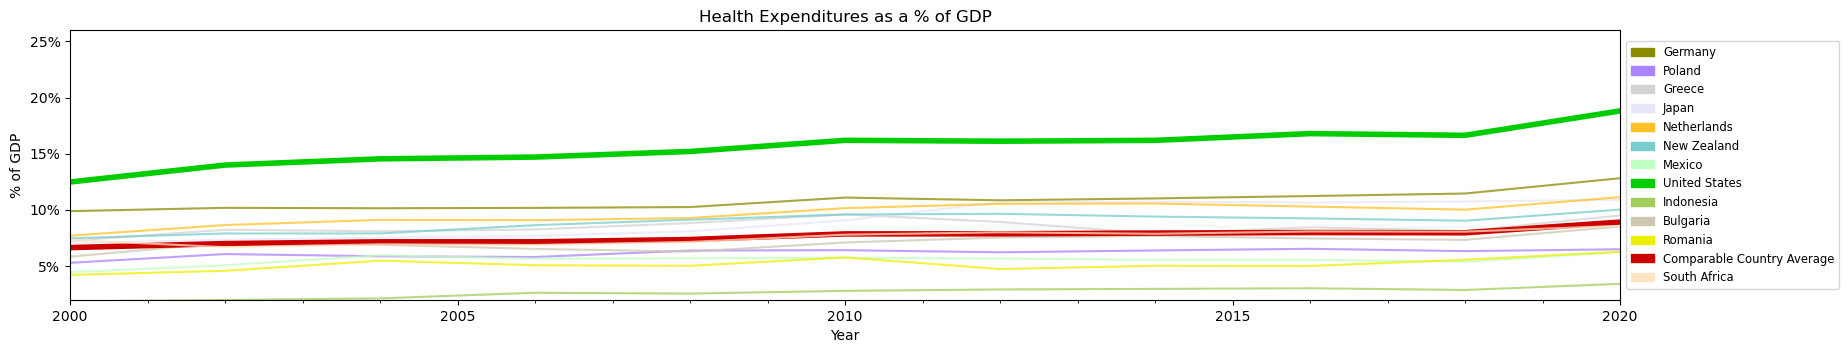

In [33]:
# Plot each countries data // RANDOM SAMPLE OF COUNTRIES, USA & COMPARABLE AVERAGE // USA & COMP AVG COLOR
# Still need to figure out comp avg
fig, ax = plt.subplots(figsize=(20,3.5))

germany_data.groupby('Country').plot(ax = ax, color='#8B8B00', alpha= 0.75)
poland_data.groupby('Country').plot(ax = ax, color='#AB82FF', alpha= 0.75)
greece_data.groupby('Country').plot(ax = ax, color='#D3D3D3', alpha= 0.75)
japan_data.groupby('Country').plot(ax = ax, color='#E6E6FA', alpha= 0.75)
netherlands_data.groupby('Country').plot(ax = ax, color='#FFC125', alpha= 0.75)
new_zealand_data.groupby('Country').plot(ax = ax, color='#79CDCD', alpha= 0.75)
mexico_data.groupby('Country').plot(ax = ax, color='#C1FFC1', alpha= 0.75)
us_data.groupby('Country').plot(ax = ax, color='#00CD00', linewidth= 4)
indonesia_data.groupby('Country').plot(ax = ax, color='#A2CD5A', alpha= 0.75)
bulgaria_data.groupby('Country').plot(ax = ax, color='#CDC8B1', alpha= 0.75)
romania_data.groupby('Country').plot(ax = ax, color='#EEEE00', alpha= 0.75)
comp_avg.groupby('Country').plot(ax = ax, color='#CD0000', linewidth=4)
south_africa_data.groupby('Country').plot(ax = ax, color='#FFE4C4', alpha= 0.75)

# Setting colors for legend
pop_1 = mpatches.Patch(color = '#8B8B00', label= 'Germany')
pop_2 = mpatches.Patch(color = '#AB82FF', label= 'Poland')
pop_3 = mpatches.Patch(color = '#D3D3D3', label= 'Greece')
pop_4 = mpatches.Patch(color = '#E6E6FA', label= 'Japan')
pop_5 = mpatches.Patch(color = '#FFC125', label= 'Netherlands')
pop_6 = mpatches.Patch(color = '#79CDCD', label= 'New Zealand')
pop_7 = mpatches.Patch(color = '#C1FFC1', label= 'Mexico')
pop_8 = mpatches.Patch(color = '#00CD00', label= 'United States')
pop_9 = mpatches.Patch(color = '#A2CD5A', label= 'Indonesia')
pop_10 = mpatches.Patch(color = '#CDC8B1', label= 'Bulgaria')
pop_11 = mpatches.Patch(color = '#EEEE00', label= 'Romania')
pop_12 = mpatches.Patch(color = '#CD0000', label= 'Comparable Country Average')
pop_13 = mpatches.Patch(color = '#FFE4C4', label= 'South Africa')

# Legend, aesthtics
ax.legend(handles=[pop_1, pop_2, pop_3, pop_4, pop_5, 
                   pop_6, pop_7, pop_8, pop_9, pop_10, pop_11,
                   pop_12, pop_13], loc='center left',
                   bbox_to_anchor=(1, 0.5), fontsize='small')
          
# Setting y limits, title, and y label
ax.yaxis.set_major_formatter("{x:.0f}%")
ax.set_ylim(2,26)
ax.set_title('Health Expenditures as a % of GDP')
ax.set_ylabel('% of GDP')

In [22]:
comp_avg

,Country,Current health expenditure (% of GDP)
Year,,
2000-01-01,Comparable Country Avg,6.642829
2002-01-01,Comparable Country Avg,6.999063
2004-01-01,Comparable Country Avg,7.155394
2006-01-01,Comparable Country Avg,7.154822
2008-01-01,Comparable Country Avg,7.361533
2010-01-01,Comparable Country Avg,7.861220
2012-01-01,Comparable Country Avg,7.871012
2014-01-01,Comparable Country Avg,7.934765
2016-01-01,Comparable Country Avg,7.983994


Text(0, 0.5, '% of GDP')

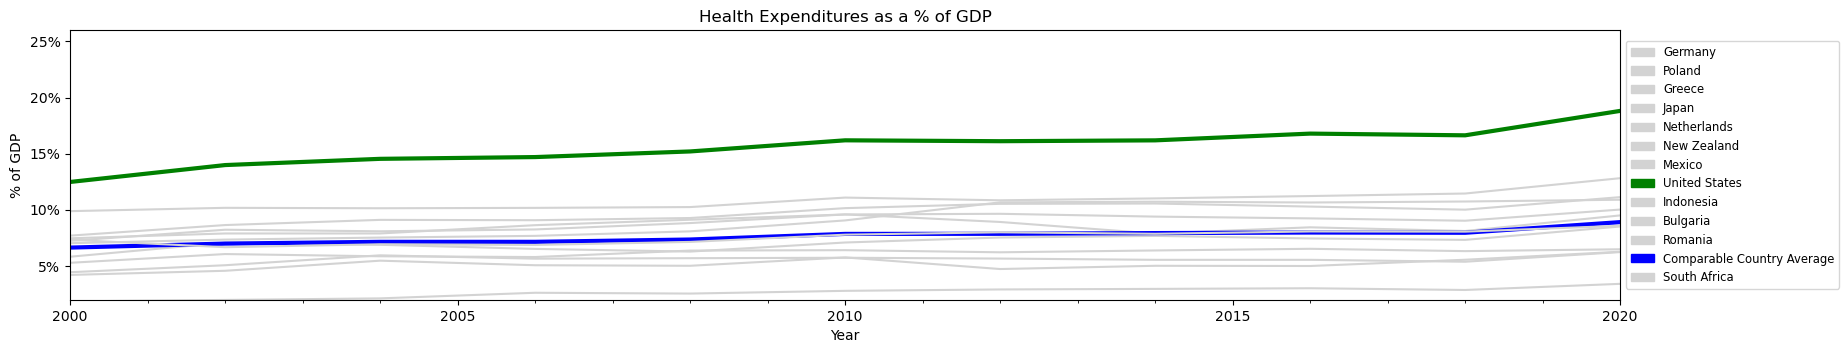

In [23]:
# Plot each countries data // RANDOM SAMPLE OF COUNTRIES, USA & COMPARABLE AVERAGE // USA & COMP AVG COLOR
# Still need to figure out comp avg
fig, ax = plt.subplots(figsize=(20,3.5))

germany_data.groupby('Country').plot(ax = ax, color='lightgray')
poland_data.groupby('Country').plot(ax = ax, color='lightgray')
greece_data.groupby('Country').plot(ax = ax, color='lightgray')
japan_data.groupby('Country').plot(ax = ax, color='lightgray')
netherlands_data.groupby('Country').plot(ax = ax, color='lightgray')
new_zealand_data.groupby('Country').plot(ax = ax, color='lightgray')
mexico_data.groupby('Country').plot(ax = ax, color='lightgray')
us_data.groupby('Country').plot(ax = ax, color='green', linewidth= 3)
indonesia_data.groupby('Country').plot(ax = ax, color='lightgray')
bulgaria_data.groupby('Country').plot(ax = ax, color='lightgray')
romania_data.groupby('Country').plot(ax = ax, color='lightgray')
comp_avg.groupby('Country').plot(ax = ax, color='blue', linewidth=3)
south_africa_data.groupby('Country').plot(ax = ax, color='lightgray')

# Setting colors for legend
pop_1 = mpatches.Patch(color = 'lightgray', label= 'Germany')
pop_2 = mpatches.Patch(color = 'lightgray', label= 'Poland')
pop_3 = mpatches.Patch(color = 'lightgray', label= 'Greece')
pop_4 = mpatches.Patch(color = 'lightgray', label= 'Japan')
pop_5 = mpatches.Patch(color = 'lightgray', label= 'Netherlands')
pop_6 = mpatches.Patch(color = 'lightgray', label= 'New Zealand')
pop_7 = mpatches.Patch(color = 'lightgray', label= 'Mexico')
pop_8 = mpatches.Patch(color = 'green', label= 'United States')
pop_9 = mpatches.Patch(color = 'lightgray', label= 'Indonesia')
pop_10 = mpatches.Patch(color = 'lightgray', label= 'Bulgaria')
pop_11 = mpatches.Patch(color = 'lightgray', label= 'Romania')
pop_12 = mpatches.Patch(color = 'blue', label= 'Comparable Country Average')
pop_13 = mpatches.Patch(color = 'lightgray', label= 'South Africa')

# Legend, aesthtics
ax.legend(handles=[pop_1, pop_2, pop_3, pop_4, pop_5, 
                   pop_6, pop_7, pop_8, pop_9, pop_10, pop_11,
                   pop_12, pop_13], loc='center left',
                   bbox_to_anchor=(1, 0.5), fontsize='small')
          
# Setting y limits, title, and y label
ax.yaxis.set_major_formatter("{x:.0f}%")
ax.set_ylim(2,26)
ax.set_title('Health Expenditures as a % of GDP')
ax.set_ylabel('% of GDP')

Text(0, 0.5, '% of GDP')

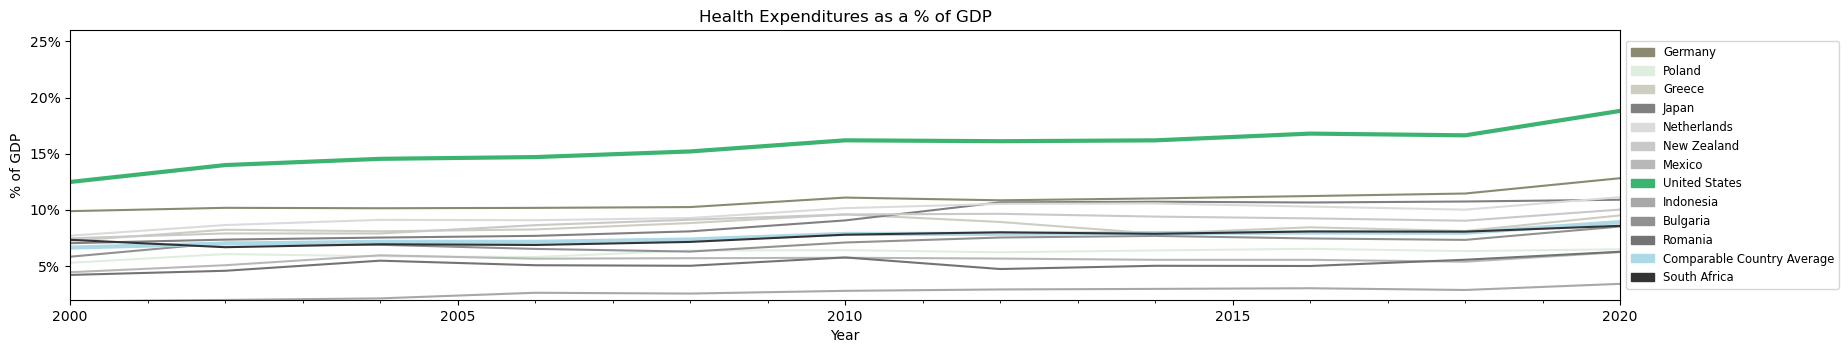

In [24]:
# Plot each countries data // RANDOM SAMPLE OF COUNTRIES, USA & COMPARABLE AVERAGE // USA & COMP AVG COLOR
# Still need to figure out comp avg
fig, ax = plt.subplots(figsize=(20,3.5))

germany_data.groupby('Country').plot(ax = ax, color='#8B8970')
poland_data.groupby('Country').plot(ax = ax, color='#E0EEE0')
greece_data.groupby('Country').plot(ax = ax, color='#CDCDC1')
japan_data.groupby('Country').plot(ax = ax, color='#808080')
netherlands_data.groupby('Country').plot(ax = ax, color='#DBDBDB')
new_zealand_data.groupby('Country').plot(ax = ax, color='#C9C9C9')
mexico_data.groupby('Country').plot(ax = ax, color='#B8B8B8')
us_data.groupby('Country').plot(ax = ax, color='#3CB371', linewidth= 3)
indonesia_data.groupby('Country').plot(ax = ax, color='#A8A8A8')
bulgaria_data.groupby('Country').plot(ax = ax, color='#919191')
romania_data.groupby('Country').plot(ax = ax, color='#737373')
comp_avg.groupby('Country').plot(ax = ax, color='#ADD8E6', linewidth=3)
south_africa_data.groupby('Country').plot(ax = ax, color='#333333')

# Setting colors for legend
pop_1 = mpatches.Patch(color = '#8B8970', label= 'Germany')
pop_2 = mpatches.Patch(color = '#E0EEE0', label= 'Poland')
pop_3 = mpatches.Patch(color = '#CDCDC1', label= 'Greece')
pop_4 = mpatches.Patch(color = '#808080', label= 'Japan')
pop_5 = mpatches.Patch(color = '#DBDBDB', label= 'Netherlands')
pop_6 = mpatches.Patch(color = '#C9C9C9', label= 'New Zealand')
pop_7 = mpatches.Patch(color = '#B8B8B8', label= 'Mexico')
pop_8 = mpatches.Patch(color = '#3CB371', label= 'United States')
pop_9 = mpatches.Patch(color = '#A8A8A8', label= 'Indonesia')
pop_10 = mpatches.Patch(color = '#919191', label= 'Bulgaria')
pop_11 = mpatches.Patch(color = '#737373', label= 'Romania')
pop_12 = mpatches.Patch(color = '#ADD8E6', label= 'Comparable Country Average')
pop_13 = mpatches.Patch(color = '#333333', label= 'South Africa')

# Legend, aesthtics
ax.legend(handles=[pop_1, pop_2, pop_3, pop_4, pop_5, 
                   pop_6, pop_7, pop_8, pop_9, pop_10, pop_11,
                   pop_12, pop_13], loc='center left',
                   bbox_to_anchor=(1, 0.5), fontsize='small')
          
# Setting y limits, title, and y label
ax.yaxis.set_major_formatter("{x:.0f}%")
ax.set_ylim(2,26)
ax.set_title('Health Expenditures as a % of GDP')
ax.set_ylabel('% of GDP')

In [25]:
# Extract 2020 comparable country average
comp_avg_2020 = comp_avg.iloc[10]
comp_avg_2020 = comp_avg_2020['Current health expenditure (% of GDP)']
comp_avg_2020

8.911098925800001

In [26]:
# New dataframe of health expenditure (% of GDP) for 2020 year
health_as_per_2020 = historical_health_reduced.loc[historical_health_reduced['Year'] == '2020']

#health_as_per_2020

In [27]:
# Add comparable country average (2020) to new dataframe
new_index_2020 = health_as_per_2020.index.max() +1
health_as_per_2020.loc[new_index_2000] = ['2020', 'Comparable Country Avg', comp_avg_2020]

In [28]:
# Reduce dataframe to columns needed to plot
health_as_per_2020 = health_as_per_2020[['Country', 'Current health expenditure (% of GDP)']]

health_as_per_2020.reset_index()

,index,Country,Current health expenditure (% of GDP)
0,510,Australia,10.648995
1,511,Austria,11.474260
2,512,Belgium,11.064532
3,513,Canada,12.939675
4,514,Czechia,9.240072
5,515,Denmark,10.528175
6,516,Finland,9.613496
7,517,France,12.205050
8,518,Germany,12.822489
9,519,Greece,9.508207


C:\Users\chris\AppData\Local\Temp\ipykernel_9628\4072689520.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(health_as_per_2020['Country'], rotation=90)


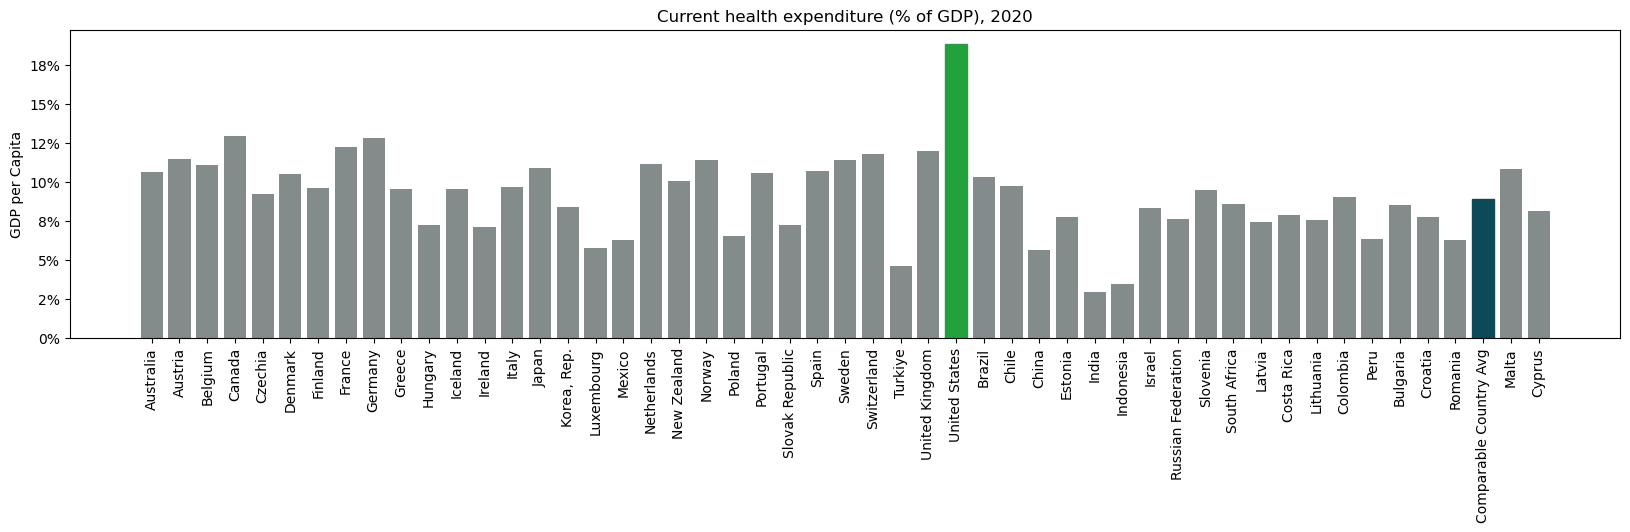

In [29]:
# Plot 2020 Health Expenditure as % of GDP data as bar graph
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(111)

ret = ax1.bar(health_as_per_2020['Country'], health_as_per_2020['Current health expenditure (% of GDP)'], color='#838b8b')
ret[29].set_color('#22a13d')
ret[48].set_color("#0d4a59")
ax1.set_xticklabels(health_as_per_2020['Country'], rotation=90)
ax1.set_title('Current health expenditure (% of GDP), 2020')
ax1.set_ylabel('GDP per Capita')
ax1.yaxis.set_major_formatter("{x:.0f}%")

In [30]:
file_path = Path("Resources/health_as_percent_2020.csv")
health_as_per_2020.to_csv(file_path, index=False)